# ML for DSAI - Midterm August 2025


Welcome to the midterm of our course.


Make sure you **read the instruction** very clearly.

1. This exam consists of three sections: section A (Q1 & Q2), section B (Q1) and section C (Q1). Please attempt all questions and include explanations for your analysis wherever applicable.

2. You are to use Python and the pandas/matplotlib libraries for data manipulation and visualization.

3. For questions requiring implementation "from scratch," you are not allowed to use pre-built functions from libraries like scikit-learn or scipy for the core logic. You may use numpy for basic array operations.

4. Write your code in the designated code cells. Add comments to explain your logic where necessary.

5. The datasets churn-bigml-80.csv and churn-bigml-20.csv are provided.



### TASK 1: Rename this file as `st12xxxx-{fullname}-midterm.ipynb`.

## Section A: EDA + correlation metrics from scratch (30 marks)

Load the dataset `Telecom Churn` and predict `Churn` based on the given data.

As usual, perform EDA with concrete reason. Explain your decision at every step.

Here you can use `sklearn` for ML task related. 

**Dataset detail**


*Telecom Churn Datasets*

Each row represents a customer; each column contains customer’s attributes. The datasets have the following attributes or features:

- State: string
- Account length: integer
- Area code: integer
- International plan: string
- Voice mail plan: string
- Number vmail messages: integer
- Total day minutes: double
- Total day calls: integer
- Total day charge: double
- Total eve minutes: double
- Total eve calls: integer
- Total eve charge: double
- Total night minutes: double
- Total night calls: integer
- Total night charge: double
- Total intl minutes: double
- Total intl calls: integer
- Total intl charge: double
- Customer service calls: integer
- Churn: string

The "churn-bigml-20" dataset contains 667 rows (customers) and 20 columns (features).

The "churn-bigml-80" dataset contains 2666 rows (customers) and 20 columns (features).

The "Churn" column is the target to predict.

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Loading Data

TRAIN = "churn-bigml-80.csv"
TEST  = "churn-bigml-20.csv"

df_train = pd.read_csv(TRAIN)
df_test  = pd.read_csv(TEST)

#Initial Data Exploration

print("Train:", df_train.shape, " Test:", df_test.shape)
display(df_train.head(3))


Train: (2666, 20)  Test: (667, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


### Q1: Do the basic EDA and write briefly about your analysis (20 marks)


<Axes: xlabel='Churn', ylabel='count'>

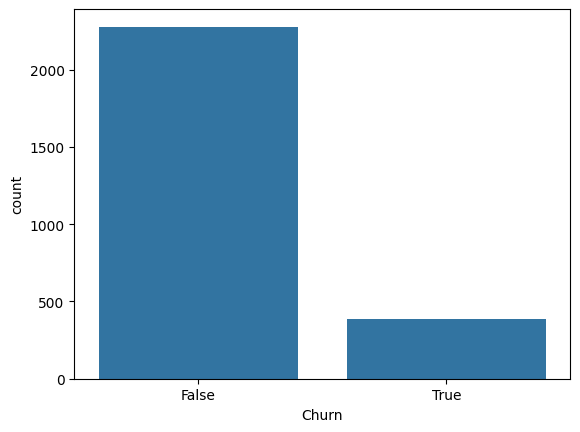

In [ ]:
# Your code goes here
#count target price for see class imbalance?
sns.countplot(data = df_train, x = 'Churn')
#from result this data is class imbalance 
#False class very bigger than True class

<Axes: xlabel='Total day charge', ylabel='Total night charge'>

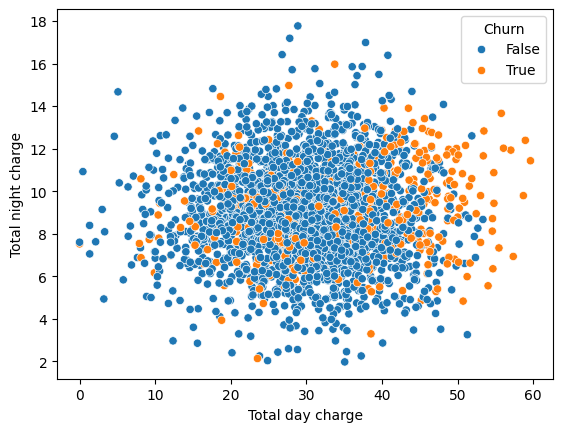

In [ ]:
sns.scatterplot(x = df_train['Total day charge'], y = df_train['Total night charge'], hue=df_train['Churn'])
#find some relationship between day charge and night charge

In [7]:
num_col = df_train.select_dtypes(include=['int64', 'float64'])
cat_col = df_train.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['Account length', 'Area code', 'Number vmail messages',
        'Total day minutes', 'Total day calls', 'Total day charge',
        'Total eve minutes', 'Total eve calls', 'Total eve charge',
        'Total night minutes', 'Total night calls', 'Total night charge',
        'Total intl minutes', 'Total intl calls', 'Total intl charge',
        'Customer service calls'],
       dtype='object'),
 Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object'))

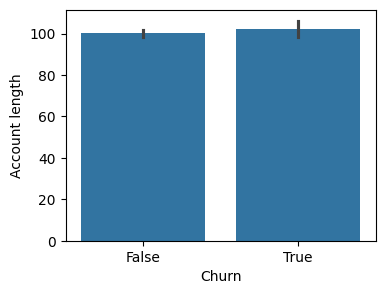

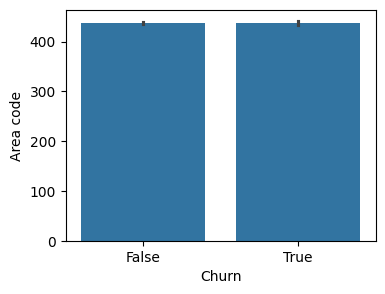

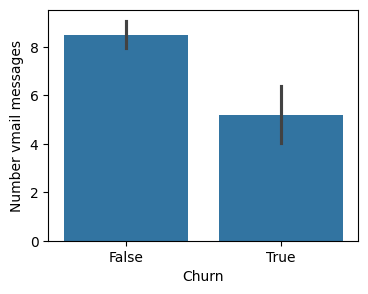

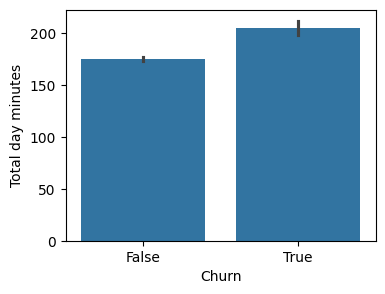

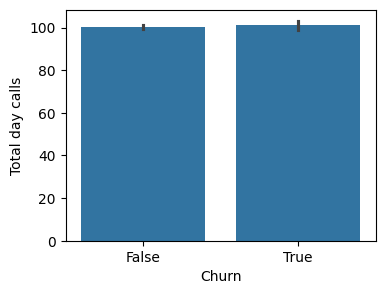

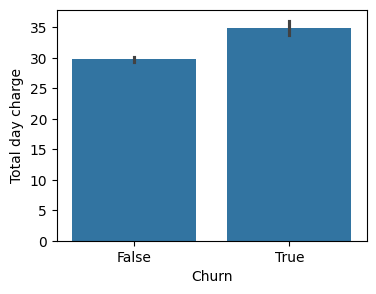

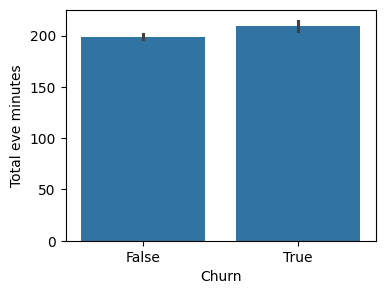

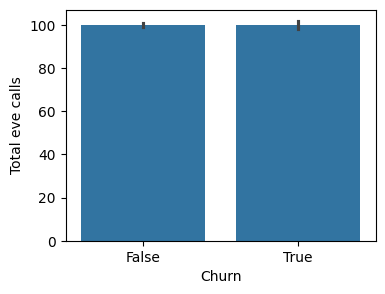

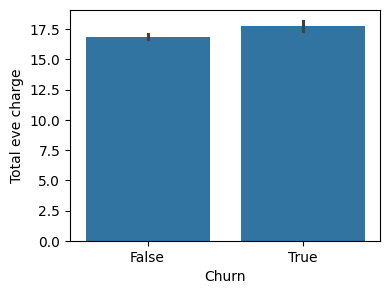

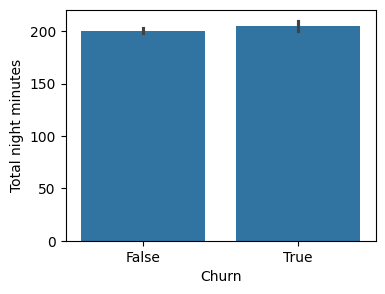

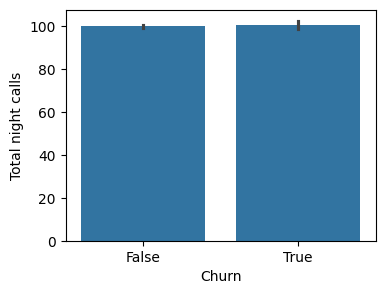

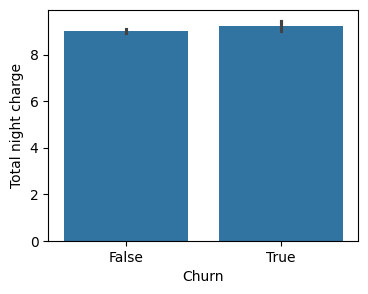

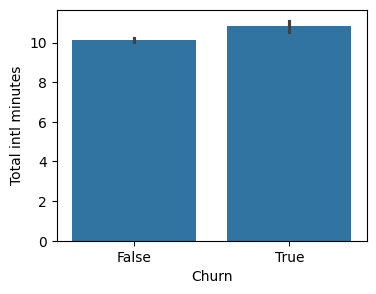

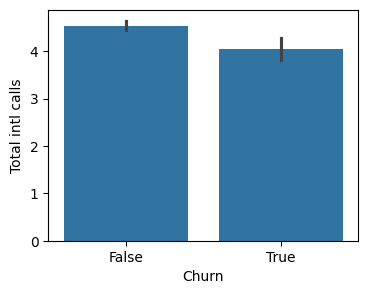

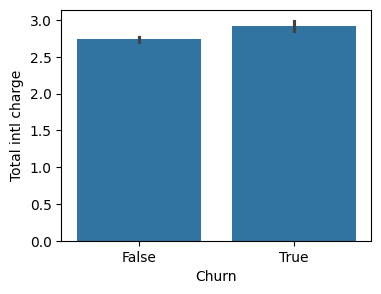

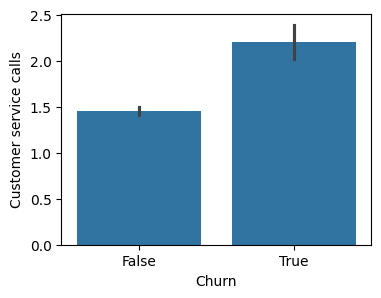

In [ ]:
#see the relation between target and numarical features
for col in num_col.columns:
    plt.figure(figsize=(4, 3))
    sns.barplot(x = df_train['Churn'], y = df_train[col])
    plt.show()

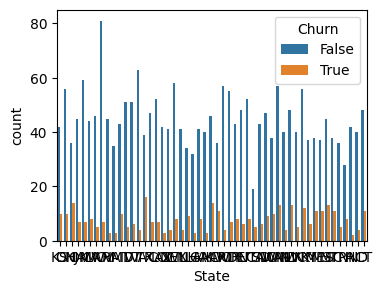

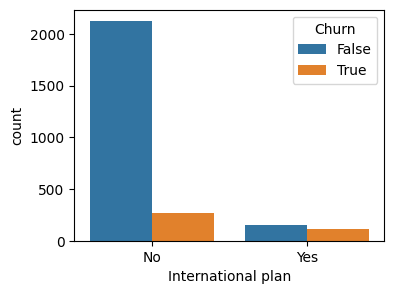

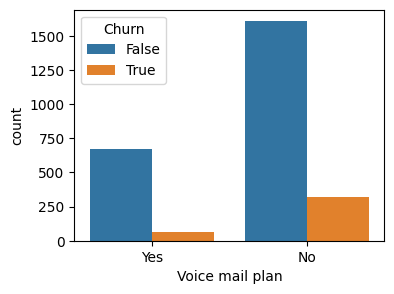

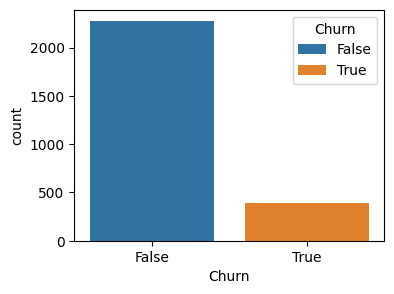

In [ ]:
#see the relation between target and categorial features
for col in cat_col.columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(x = df_train[col], hue = df_train['Churn'])
    #similar to hue in scatterplot
    plt.show()

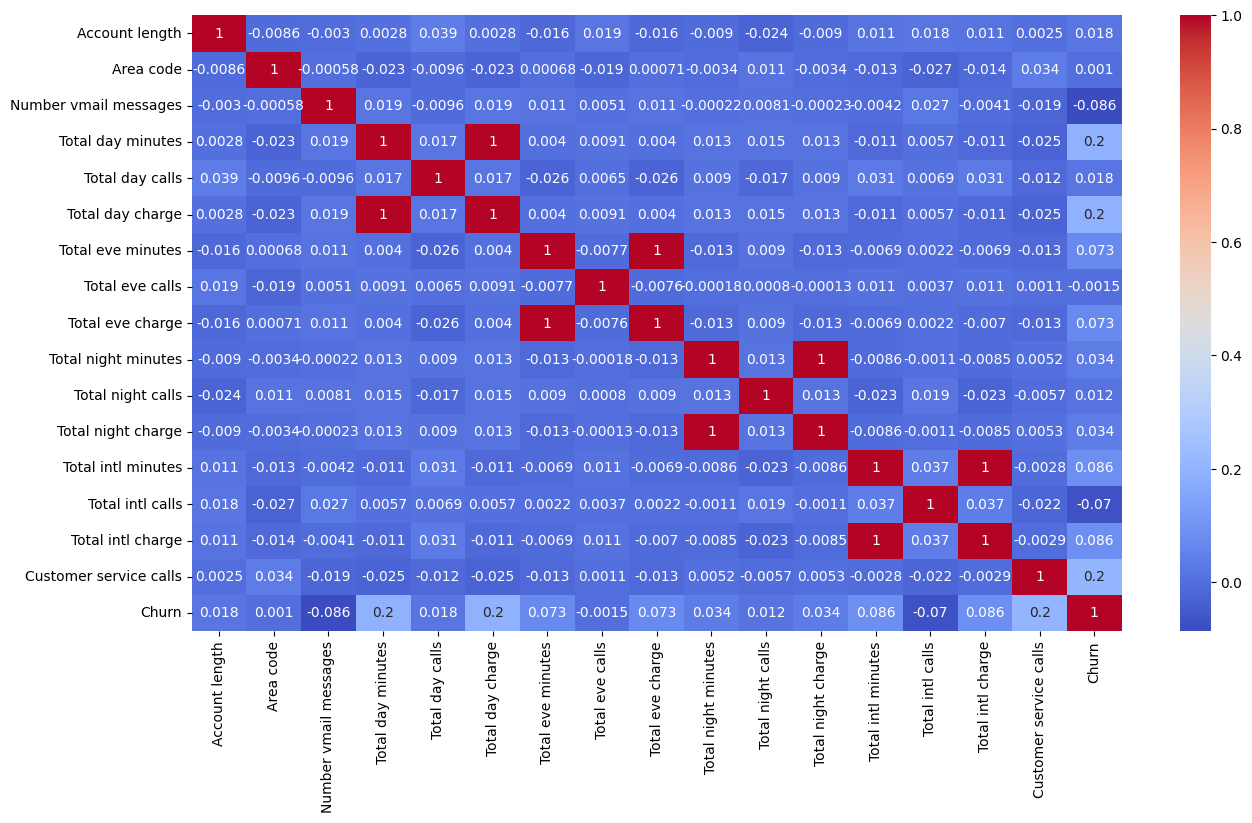

In [ ]:
#Let's check out heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()
#from heatmap we see 4 feature have strong corr so don't use together to train model.

### Q2: Implementation of Pearson's Correlation from Scratch (10 marks)



Write Pearson's correlation function from scratch and compute the correlation matrix of the given matrix. Compare your result with `numpy.corrcoef()`

$$ \rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} $$

$\text{cov}$ is the covariance function

$\sigma_X$ is the standard deviation of $X$

$\sigma_Y$ is the standard deviation of $Y$

$\rho_{X,Y}$ is the pearson's correlation of $X$ and $Y$

Correlation Matrix ($R$)

$ R_{i,j} = \rho_{X_{i}, X_{j}} $

$X_{i}$ is the column $i^{th}$ of matrix $X$

$X_{j}$ is the column $j^{th}$ of matrix $X$

$R_{i,j}$ is the correlation between $X_i$ and $X_j$

In [6]:
import numpy as np
data = np.array([[1,0,10,5],
    [2,1,5,4],
    [3,0,100,3],
    [4,1,4,2],
    [5,0,0,1]])
np.corrcoef(data, rowvar=False)

array([[ 1.        ,  0.        , -0.07767768, -1.        ],
       [ 0.        ,  1.        , -0.4121674 ,  0.        ],
       [-0.07767768, -0.4121674 ,  1.        ,  0.07767768],
       [-1.        ,  0.        ,  0.07767768,  1.        ]])

In [ ]:
# Your code 
data = np.array([[1,0,10,5],
    [2,1,5,4],
    [3,0,100,3],
    [4,1,4,2],
    [5,0,0,1]])
def Pearson_Correlation(x,y):
    


### Section B: KNN-Classification from Scratch (20 marks)

#### Q1. a) KNN Predict Function (10 Marks):
Write a function knn_predict that classifies a new data point. The function should:

1. Accept the following arguments: training data (X_train), training labels (y_train), a new data point to classify (new_point), and the number of neighbors k.

2. Calculate the distance from new_point to all points in X_train using your euclidean_distance function.

3. Identify the k nearest neighbors.

4. Predict the class of new_point based on a majority vote of its k nearest neighbors' labels.

5. Return the predicted class label.



In [ ]:
# Your code here
#step: finddistance and sort it >> select K k nearest neighbors >> find the marjority class

from sklearn.preprocessing import StandardScaler
#standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[num_col])
X_test = scaler.transform(df_test[num_col])

In [ ]:
#Function for pairwise distance
def find_distance(X_train, X_test):
    #create newaxis simply so that broadcast to all values
    dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
    sq_dist = dist ** 2
    
    #sum across feature dimension, thus axis = 2
    summed_dist = sq_dist.sum(axis=2)  #basically x + y
    sq_dist = np.sqrt(summed_dist)
    return sq_dist

In [ ]:
# sort the pairwise distance matrix
def find_neighbors(X_train, X_test, k=3):
    dist = find_distance(X_train, X_test)
    #return the first k neighbors
    neighbors_ix = np.argsort(dist)[:, 0:k]
    return neighbors_ix

In [ ]:
#function to get majority class
def get_majority(y):
    return np.bincount(y).argmax()

#### b) Making a Prediction (5 Marks):
Consider the following small dataset and a new point. Use only the features 'Total day minutes' and 'Customer service calls'.
Using your knn_predict function, predict whether new_customer will churn (True or False) with k=3. Show your function call and the predicted output.

In [ ]:
# Provided data for this question
X_train_sample = [[265.1, 1], [161.6, 1], [243.4, 0], [299.4, 2], [166.7, 3]]
y_train_sample = [False, False, False, False, False] # Represents the 'Churn' status
new_customer = [250.0, 2]

### Section C: k-NN with Cosine Distance (10 marks) (Bonus)
Q1. Modify your previous k-NN implementation, but this time use cosine distance.

The cosine similarity between two vectors a,b is defined as:

$$
\text{cos\_sim}(a,b) \;=\; \frac{a \cdot b}{\|a\|\|b\|}
$$

The corresponding cosine distance is:

$$
d_{\text{cos}}(a,b) \;=\; 1 - \text{cos\_sim}(a,b)
$$

Tasks

1. Write a function cosine_distance(a, b) from scratch.

2. Use this new distance inside your k-NN implementation (with k=5) and evaluate on the test set.

In [ ]:
# Your code goes here